In [1]:
import pandas as pd
import json
import ast
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# load dataset

In [175]:
movie_df = pd.read_csv('../data/tmdb_5000_movies.csv')
credits_df = pd.read_csv('../data/tmdb_5000_credits.csv')

In [224]:
df = pd.merge(movie_df, credits_df, left_on = 'id', right_on = 'movie_id')
raw_dataset = df.copy()

# data exploration

In [178]:
# Shape of the dataset
shape = df.shape

# Data types of the columns
data_types = df.dtypes

# Check for missing values
missing_values = df.isnull().sum()

# Descriptive statistics of the numerical columns
descriptive_stats = df.describe()

# Count of unique values for each column
unique_counts = df.nunique()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
movie_id                   0
title_y                    0
cast                       0
crew                       0
dtype: int64

In [179]:
shape, data_types, missing_values, descriptive_stats, unique_counts

((4803, 24),
 budget                    int64
 genres                   object
 homepage                 object
 id                        int64
 keywords                 object
 original_language        object
 original_title           object
 overview                 object
 popularity              float64
 production_companies     object
 production_countries     object
 release_date             object
 revenue                   int64
 runtime                 float64
 spoken_languages         object
 status                   object
 tagline                  object
 title_x                  object
 vote_average            float64
 vote_count                int64
 movie_id                  int64
 title_y                  object
 cast                     object
 crew                     object
 dtype: object,
 budget                     0
 genres                     0
 homepage                3091
 id                         0
 keywords                   0
 original_language          0

In [180]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'movie_id', 'title_y', 'cast', 'crew'],
      dtype='object')

# Data Cleaning

In [225]:
# Define a function to check if the value contains 'http'
def has_http(value):
    if isinstance(value, str) and 'http' in value:
        return 1
    else:
        return 0


# Apply the function to the 'homepage' column and create a new column 'has_homepage'
df.loc[:, 'has_homepage'] = df['homepage'].apply(lambda x: has_http(x))
del df['homepage']

- Standardize Text Data and datetime and Normalization and Scaling

In [227]:
df['title_x'] = df['title_x'].str.lower()  # Convert titles to lowercase

df['popularity_normal'] = (df['popularity'] - df['popularity'].min()) / (df['popularity'].max() - df['popularity'].min())

In [189]:
#keep only released movies
# df = df[df['status'] == 'Released']
# del df['status']

- handling missing values

In [228]:
from sklearn.impute import SimpleImputer

df = df[df['runtime'] != 0]
runtime_median = df[df['runtime'] != 0]['runtime'].median()

# Replace both NaN and zeroes with the median
imputer_med = SimpleImputer(strategy='constant', fill_value=runtime_median)
df['runtime'] = imputer_med.fit_transform(df[['runtime']])

df['release_date'] = pd.to_datetime(df['release_date'])
imputer_med = SimpleImputer(strategy='median')
df['release_date'] = imputer_med.fit_transform(df[['release_date']])


In [229]:
# Convert release_date to datetime format
df["release_date"] = pd.to_datetime(df["release_date"])

# Extract year, month, day, and day of week
df["year"] = df["release_date"].dt.year
df["month"] = df["release_date"].dt.month
df["day"] = df["release_date"].dt.day
df["dow"] = df["release_date"].dt.dayofweek

# del df["release_date"]

- replacing overviews where is none

In [230]:
df.loc[df['id'] == 370980, 'overview'] = 'Following the rise of father Jorge Mario Bergoglio from his early life as a teacher in a Jesuit High School in Argentina, to archbishop and cardinal of Buenos Aires, until he was elected Pope of the Roman Catholic Church.'

df.loc[df['id'] == 459488, 'overview'] = 'An exploration of how singer and actor Frank Sinatra became one of the biggest stars of the 20th century while remaining, in his heart, a normal person.'

df = df[df['id'] != 292539]

~ Dealing with JSON Fields

In [231]:
# Parsing the genres column from JSON format
df['genres'] = df['genres'].apply(
    lambda x: [genre['name'] for genre in json.loads(x)])

df['keywords'] = df['keywords'].apply(
    lambda x: [key['name'] for key in json.loads(x)])

df['production_companies'] = df['production_companies'].apply(
    lambda x: [company['name'] for company in json.loads(x)])

df['production_countries'] = df['production_countries'].apply(
    lambda x: [country['name'] for country in json.loads(x)])

df['spoken_languages'] = df['spoken_languages'].apply(
    lambda x: [language['iso_639_1'] for language in json.loads(x)])

In [232]:
def json_convert(obj):
    l=[]
    counter=0
    for i in ast.literal_eval(obj):
        if counter !=10:
            l.append(i['name'])
            counter+=1
        else:
            break
    return l

df['cast']=df['cast'].apply(json_convert)

In [233]:
def fetch_crew(obj):
    L=[]
    for i in ast.literal_eval(obj):
        if i['job']=='Director' or i['job']=='Writer' or i['job']=='Producer':
            L.append(i['name'])
    return L


df['crew']=df['crew'].apply(fetch_crew)

In [234]:
df['overview'] = df['overview'].apply(lambda x: x.split())
df['genres'] = df['genres'].apply(lambda x:[i.replace(' ','') for i in x])
df['keywords'] = df['keywords'].apply(lambda x:[i.replace(' ','') for i in x])
df['cast'] = df['cast'].apply(lambda x:[i.replace(' ','') for i in x])
df['crew'] = df['crew'].apply(lambda x:[i.replace(' ','') for i in x])

In [235]:
df.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'movie_id', 'title_y', 'cast', 'crew', 'has_homepage',
       'popularity_normal', 'year', 'month', 'day', 'dow'],
      dtype='object')

* Count of empty lists for each column

In [236]:
empty_list_counts = {}

for column in df.columns:
    if df[column].apply(lambda x: isinstance(x, list)).any():
        empty_list_counts[column] = sum(df[column].apply(lambda x: len(x) == 0))

for column, count in empty_list_counts.items():
    print(f"Column '{column}' has {count} empty lists.")

Column 'genres' has 15 empty lists.
Column 'keywords' has 387 empty lists.
Column 'overview' has 1 empty lists.
Column 'production_companies' has 321 empty lists.
Column 'production_countries' has 147 empty lists.
Column 'spoken_languages' has 63 empty lists.
Column 'cast' has 29 empty lists.
Column 'crew' has 17 empty lists.


# creating Profit column

In [248]:
df['profit'] = df['revenue'] - df['budget']

# visualizitaion

C:\Users\ROG\AppData\Local\Temp\ipykernel_13972\1611914426.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="original_language", data=df, palette=current_palette)
C:\Users\ROG\AppData\Local\Temp\ipykernel_13972\1611914426.py:3: UserWarning: 
The palette list has fewer values (10) than needed (37) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x="original_language", data=df, palette=current_palette)


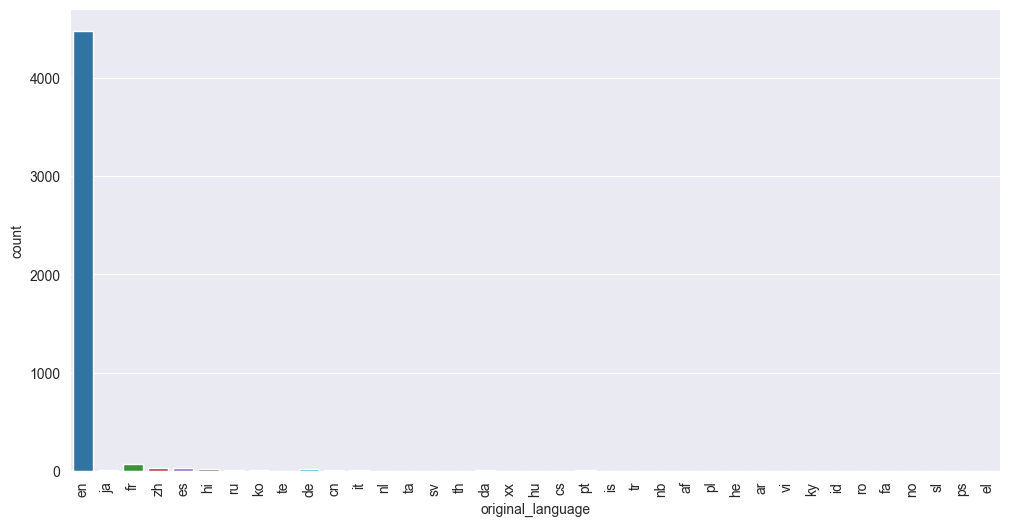

In [220]:
current_palette = sns.color_palette() 
plt.figure(figsize=(12, 6))
sns.countplot(x="original_language", data=df, palette=current_palette)
plt.xticks(rotation=90)
plt.show()

~ Correlation Heatmap

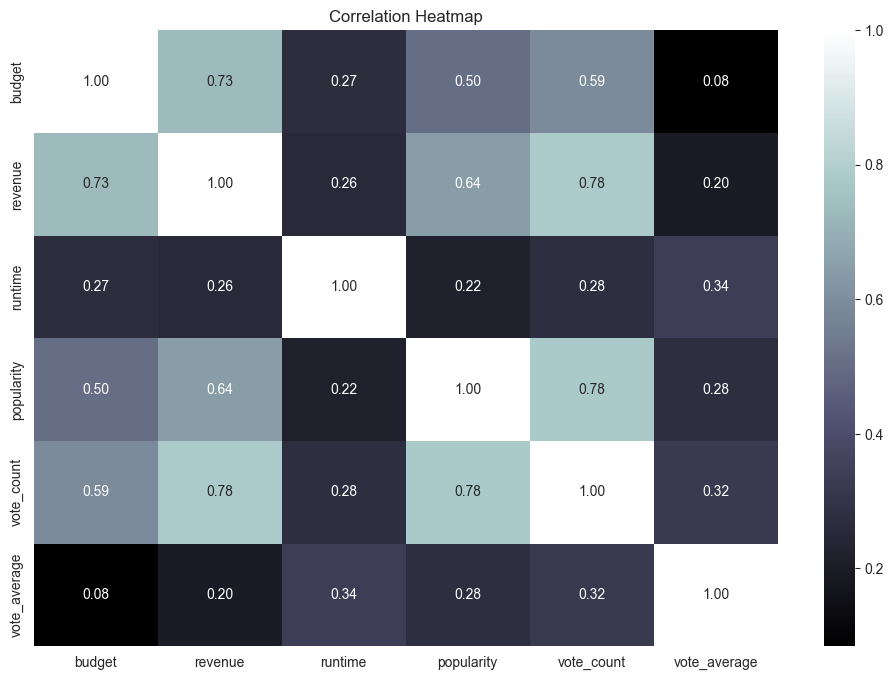

In [84]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[['budget', 'revenue', 'runtime', 'popularity', 'vote_count', 'vote_average']].corr(), annot=True, cmap='bone', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

~ Boxplot

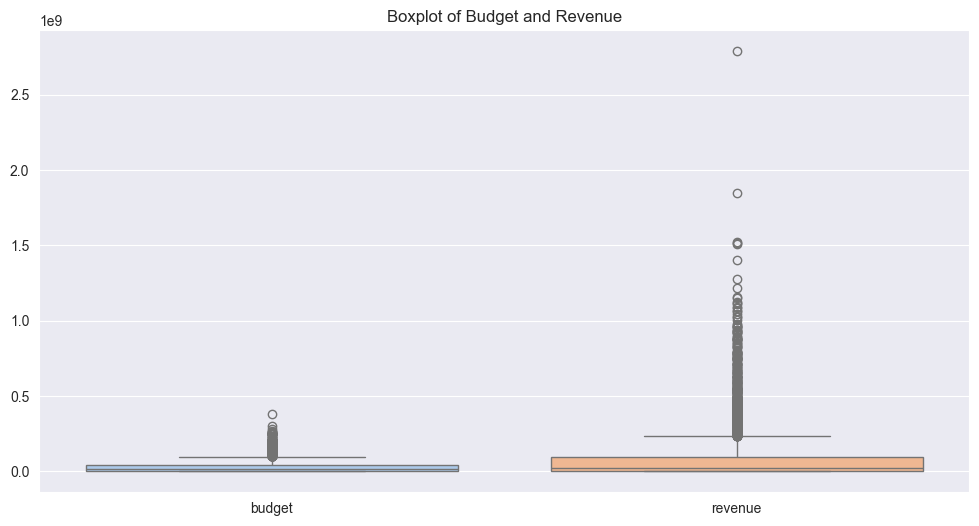

In [239]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['budget', 'revenue']], palette='pastel')
plt.title('Boxplot of Budget and Revenue')
plt.show()

~ Bar Plot for Genres

C:\Users\ROG\AppData\Local\Temp\ipykernel_13972\3511931928.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='rocket')


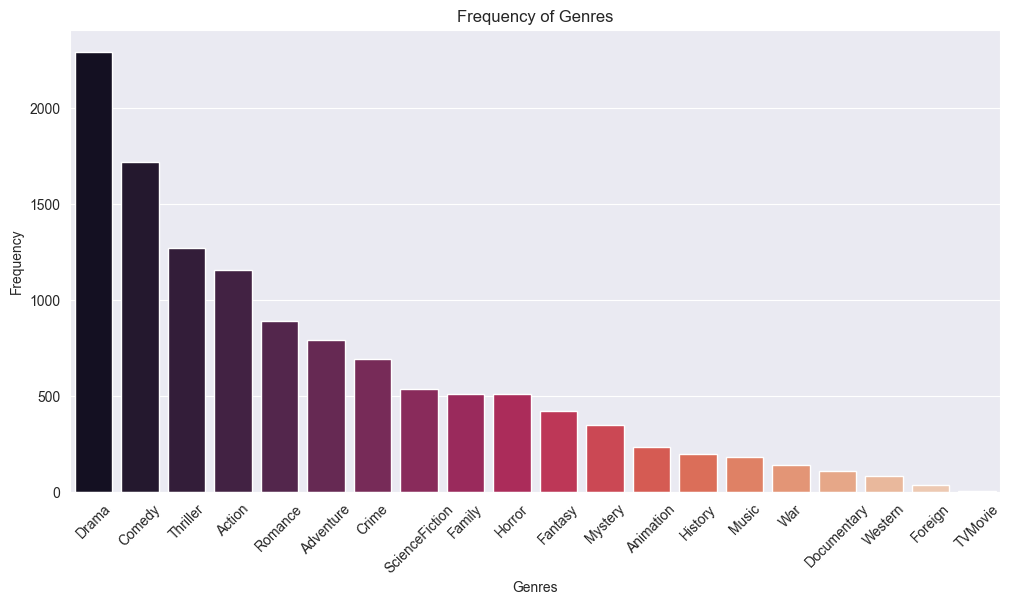

In [240]:
plt.figure(figsize=(12, 6))
genre_counts = df['genres'].explode().value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='rocket')
plt.title('Frequency of Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
(plt.xticks
(rotation=45))
plt.show()

~ Bar Plot for Original Language

C:\Users\ROG\AppData\Local\Temp\ipykernel_13972\269883203.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette='Set2')


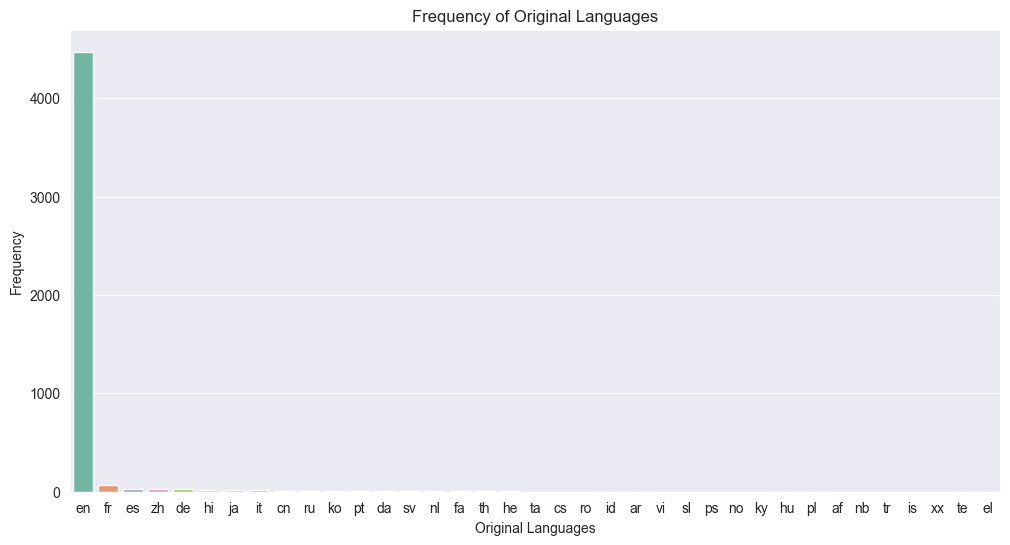

In [243]:
plt.figure(figsize=(12, 6))
language_counts = df['original_language'].value_counts()
sns.barplot(x=language_counts.index, y=language_counts.values, palette='Set2')
plt.title('Frequency of Original Languages')
plt.xlabel('Original Languages')
plt.ylabel('Frequency')
plt.show()

~ Histogram

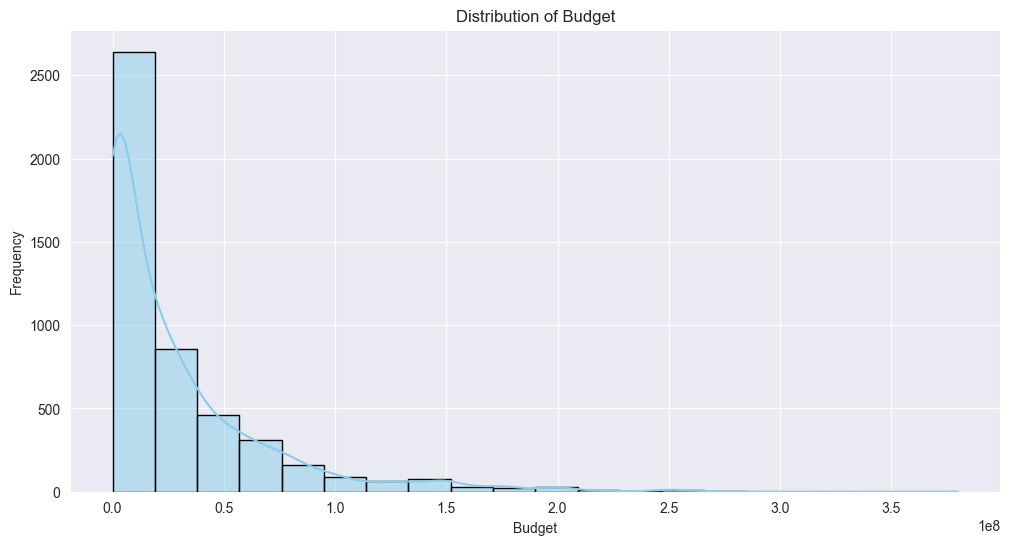

In [244]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='budget', kde=True, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Budget')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()

~ Scatter Plot

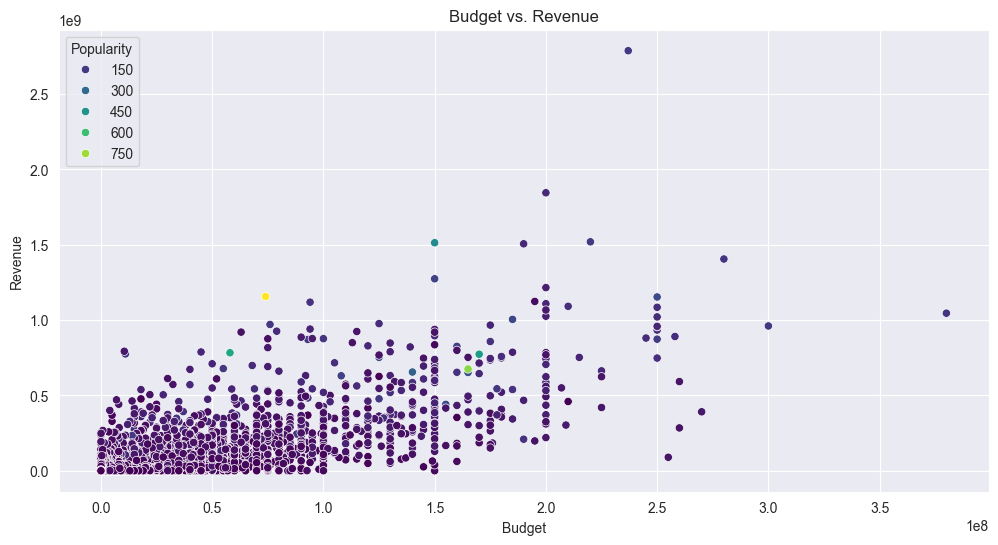

In [245]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='budget', y='revenue', hue='popularity', palette='viridis', legend='brief')
plt.title('Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.legend(title='Popularity', loc='upper left')
plt.show()

locate the movie with the max runtime

In [249]:
max_runtime_id = df["runtime"].idxmax() 
print(df.loc[max_runtime_id][['title_x','runtime','year', 'overview']])

title_x                                                carlos
runtime                                                 338.0
year                                                     2010
overview    [The, story, of, Venezuelan, revolutionary,, I...
Name: 2384, dtype: object


Most popular Movie

In [250]:
pop = df["popularity"].idxmax()
print(df.loc[pop][['title_x','profit','year','vote_average', 'crew']])

title_x                                                   minions
profit                                                 1082730962
year                                                         2015
vote_average                                                  6.4
crew            [ChristopherMeledandri, KyleBalda, JanetHealy,...
Name: 546, dtype: object


top 10 movies in regards to rating

In [251]:
top = df.nlargest(10,'vote_average')
print('Most voted')
top[['title_x','year','vote_average', 'revenue']]

Most voted


,title_x,year,vote_average,revenue
3519,stiff upper lips,1998,10.0,0
4045,"dancer, texas pop. 81",1998,10.0,565592
4247,me you and five bucks,2015,10.0,0
2386,one man's hero,1999,9.3,0
1881,the shawshank redemption,1994,8.5,28341469
2970,there goes my baby,1994,8.5,123509
2796,the prisoner of zenda,1937,8.4,0
3337,the godfather,1972,8.4,245066411
662,fight club,1999,8.3,100853753
1818,schindler's list,1993,8.3,321365567


most profitable movies

In [252]:
most_profits = df.nlargest(10,'profit')
most_profits[['title_x','profit','year','vote_average']]

,title_x,profit,year,vote_average
0,avatar,2550965087,2009,7.2
25,titanic,1645034188,1997,7.5
28,jurassic world,1363528810,2015,6.5
44,furious 7,1316249360,2015,7.3
16,the avengers,1299557910,2012,7.4
7,avengers: age of ultron,1125403694,2015,7.3
124,frozen,1124219009,2013,7.3
546,minions,1082730962,2015,6.4
329,the lord of the rings: the return of the king,1024888979,2003,8.1
31,iron man 3,1015439994,2013,6.8


~ Generate word cloud

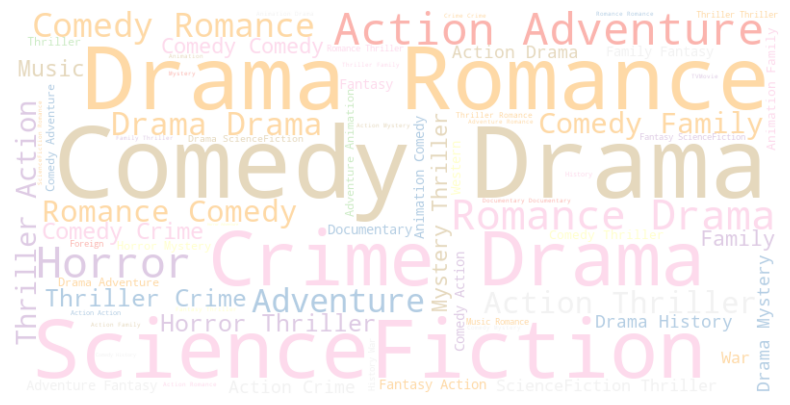

In [253]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

genres_list = df['genres'].explode().dropna()

genres_text = ' '.join(genres_list)
wordcloud = WordCloud(width=800, height=400, background_color ='white', colormap='Pastel1').generate(genres_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Model dataset prepration

In [ ]:
df.drop(columns=[ 'release_date', 'status', 'original_title', 'tagline', 'movie_id', 'title_y'], inplace=True)
df.drop_duplicates(inplace=True)

In [171]:
df = df.reindex(columns=['title_x',  'original_language', 'spoken_languages', 'year', 'production_companies', 'production_countries', 'month', 'day', 'dow', 'revenue', 'budget', 'runtime', 'popularity', 'has_homepage', 'cast', 'crew', 'vote_count', 'vote_average', 'profit'])

In [172]:
data = df.copy()

In [173]:
data.drop(columns=['overview', 'id', 'original_language', 'overview','genres',  'keywords', 'production_companies', 'production_countries','cast', 'crew',], inplace=True)

KeyError: "['overview', 'id', 'overview', 'genres', 'keywords'] not found in axis"

In [159]:
# Replace the list with the first item
data["genres"] = data["genres"].apply(lambda x: x[0] if x else None)
data["keywords"] = data["keywords"].apply(lambda x: x[0] if x else None)
data["spoken_languages"] = data["spoken_languages"].apply(lambda x: x[0] if x else None)
data["production_companies"] = data["production_companies"].apply(lambda x: x[0] if x else None)
data["production_countries"] = data["production_countries"].apply(lambda x: x[0] if x else None)
data["crew"] = data["crew"].apply(lambda x: x[0] if x else None)
data["cast"] = data["cast"].apply(lambda x: x[0] if x else None)


In [162]:
# Define a function to check if the value contains 'http'
def profit_class(value):
    if  value >= 0:
        return 1
    else:
        return 0


data.loc[:, 'profit'] = data['profit'].apply(lambda x: profit_class(x))

In [161]:
data.replace(to_replace=[None], value=np.nan, inplace=True)
data.dropna(inplace=True)

# Machine Learning

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

- Feature Engineering and Selection

In [164]:
# Defining the target variable
data['profitable'] = data['profit'].apply(lambda x: 1 if x == 1 else 0)

# Dropping irrelevant columns
data.drop(['title_x', 'genres', 'keywords', 'original_language', 'spoken_languages',
           'year', 'month', 'day', 'dow', 'revenue', 'budget', 'popularity',
           'has_homepage', 'vote_count', 'vote_average', 'profit'],
          axis=1, inplace=True)

# Encoding categorical variables
le = LabelEncoder()
data['cast_encoded'] = le.fit_transform(data['cast'])
data['crew_encoded'] = le.fit_transform(data['crew'])
data.drop(['cast', 'crew'], axis=1, inplace=True)

# Splitting the data into train and test sets
X = data.drop('profitable', axis=1)
y = data['profitable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Model Training and Evaluation
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

results = {}
roc_auc_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
    roc_auc_scores[name] = roc_auc

In [166]:
# Plotting ROC-AUC Curve
plt.figure(figsize=(10, 6))
for name, model in models.items():
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_scores[name]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()

# Displaying results
results_df = pd.DataFrame.from_dict(results, orient='index')
print(results_df)

AttributeError: 'LogisticRegression' object has no attribute 'classes_'

<Figure size 1000x600 with 0 Axes>

In [169]:
data

,production_companies,production_countries,runtime,profitable,cast_encoded,crew_encoded
0,Ingenious Film Partners,United States of America,162.0,1,1453,798
1,Walt Disney Pictures,United States of America,169.0,1,832,686
2,Columbia Pictures,United Kingdom,148.0,1,370,1693
3,Legendary Pictures,United States of America,165.0,1,302,290
4,Walt Disney Pictures,United States of America,132.0,1,1586,91
...,...,...,...,...,...,...
4795,Asylum Films,United States of America,98.0,1,384,137
4796,Thinkfilm,United States of America,77.0,1,1500,1736
4798,Columbia Pictures,Mexico,81.0,1,246,1622
4800,Front Street Pictures,United States of America,120.0,1,507,727


In [168]:
# Define target variable
data['profitable'] = np.where(data['profitable'] > 0, 1, 0)

# Perform feature engineering and select features
selected_features = ['runtime', 'cast_encoded', 'crew_encoded']

# Convert categorical variables to numerical using one-hot encoding or label encoding
# Since there are no categorical variables in this sample data, no further conversion is needed

# Split data into training and testing sets
X = data[selected_features]
y = data['profitable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc,
        "FPR": fpr,
        "TPR": tpr
    }

# Plot ROC-AUC curves
plt.figure(figsize=(10, 6))
for name, result in results.items():
    plt.plot(result["FPR"], result["TPR"], label=f'{name} (ROC-AUC = {result["ROC-AUC"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Print results
print("Model Evaluation Results:")
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['Accuracy']:.2f}")
    print(f"Precision: {result['Precision']:.2f}")
    print(f"Recall: {result['Recall']:.2f}")
    print(f"F1-Score: {result['F1-Score']:.2f}")
    print(f"ROC-AUC: {result['ROC-AUC']:.2f}")
    print()

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1